# Data Science Nigeria 2019 AI Bootcamp Hackathon

### The Data Science Workflow

1. Pose a Question
2. Acquire Data
3. Data Preprocessing 
4. Exploratory Data Analysis to gain insights and patterns
5. Feature Transformation 
6. Modelling and Evaluation

### Step 1 -  Problem Statement

To build a classification model help predict the probability of a building having at least one claim over the insured period through leveraging of historical data

### Step 2 -  Loading the Data

In [884]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style as style
# Use a clean stylizatino for our charts and graphs
import matplotlib.ticker as ticker

import os
plt.style.use('fivethirtyeight')

#To ignore Seaborn warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from xgboost import XGBClassifier as xgbc
import lightgbm as lgb

In [885]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
variable = pd.read_csv("VariableDescription.csv")

In [886]:
variable

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [887]:
id = test['Customer Id']

### Step3 & 4 : Performing  Data Preprocessing  EDA
Data Preprocessing to be done include;

1. Checking for `Duplicates`
2. Checking for `Missing Values`
3. Checking for `Outliers` and treat them if needed
4. Perform Exploratory Data Analysis

In [888]:
#------------------1. Checking for Duplicates----------------------------------------
print('The shape of the train data is {}'.format(train.shape))
print()

print ('The shape of unique data is {}'.format(train['Customer Id'].unique().shape))
print()
print('The shape of the test data is {}'.format(test.shape))
print()
print ('The shape of unique data is {}'.format(test['Customer Id'].unique().shape))



The shape of the train data is (7160, 14)

The shape of unique data is (7160,)

The shape of the test data is (3069, 13)

The shape of unique data is (3069,)


In [889]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [890]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [891]:
missing = pd.DataFrame((train.isnull().mean() * 100).reset_index())
missing.columns = ['Variables','% Missing Information']
missing[missing['% Missing Information'] > 0]

,Variables,% Missing Information
6,Garden,0.097765
8,Building Dimension,1.480447
10,Date_of_Occupancy,7.094972
12,Geo_Code,1.424581


In [892]:
train['Garden'].value_counts(normalize=True)

O    0.503565
V    0.496435
Name: Garden, dtype: float64

In [893]:
train['Garden'].fillna(train.Garden.value_counts().index[0],inplace=True)
test['Garden'].fillna(test.Garden.value_counts().index[0],inplace=True)

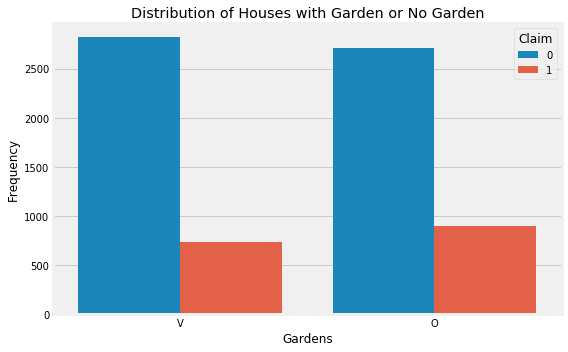

In [894]:
plt.figure(figsize=(8,5))
sns.countplot(train['Garden'], hue='Claim', data=train)
plt.title("Distribution of Houses with Garden or No Garden")
plt.xlabel("Gardens")
plt.ylabel("Frequency")
plt.tight_layout()


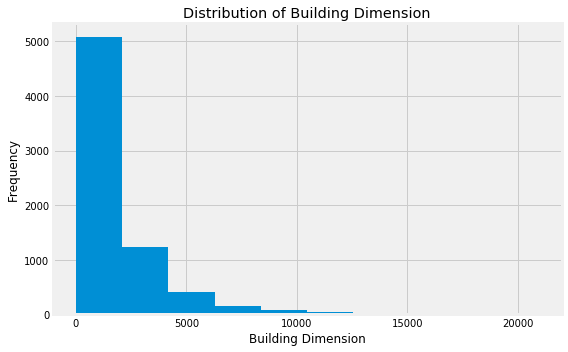

In [895]:
plt.figure(figsize=(8,5))
train['Building Dimension'].plot.hist()
plt.title("Distribution of Building Dimension")
plt.xlabel("Building Dimension")
plt.ylabel("Frequency")
#plt.xticks(range(0, train['Building Dimension'].astype('int').max(),2000))
plt.tight_layout()

In [896]:
train['Building Dimension'].fillna(train['Building Dimension'].median(),inplace=True)
test['Building Dimension'].fillna(test['Building Dimension'].median(),inplace=True)

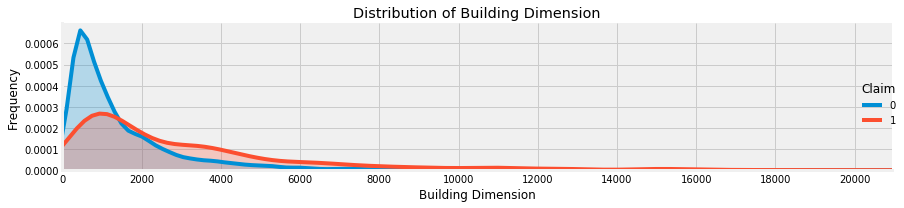

In [897]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'Building Dimension',shade= True)
facet.set(xlim=(0, train['Building Dimension'].max()))
facet.add_legend()
plt.title("Distribution of Building Dimension")
plt.xlabel("Building Dimension")
plt.ylabel("Frequency")
plt.xticks(range(0, train['Building Dimension'].astype('int').max(),2000))
plt.tight_layout()
plt.show()

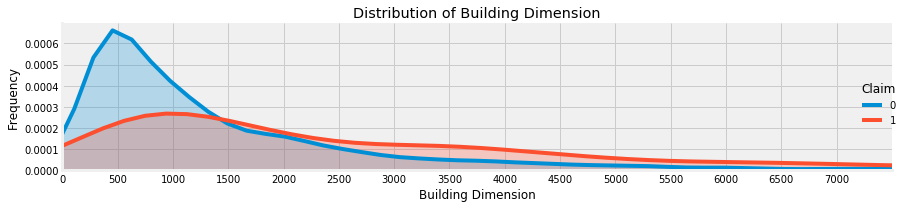

In [898]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'Building Dimension',shade= True)
facet.set(xlim=(0, train['Building Dimension'].max()))
facet.add_legend()
plt.title("Distribution of Building Dimension")
plt.xlabel("Building Dimension")
plt.ylabel("Frequency")
plt.xlim(0,7500)
plt.xticks(range(0, 7500,500))
plt.tight_layout()
plt.show()

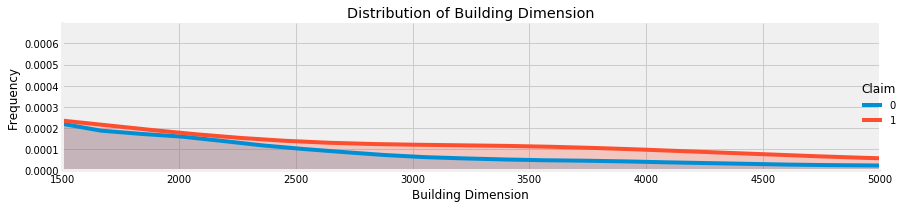

In [899]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'Building Dimension',shade= True)
facet.set(xlim=(0, train['Building Dimension'].max()))
facet.add_legend()
plt.title("Distribution of Building Dimension")
plt.xlabel("Building Dimension")
plt.ylabel("Frequency")
plt.xlim(1500,5000)
plt.tight_layout()
plt.show()

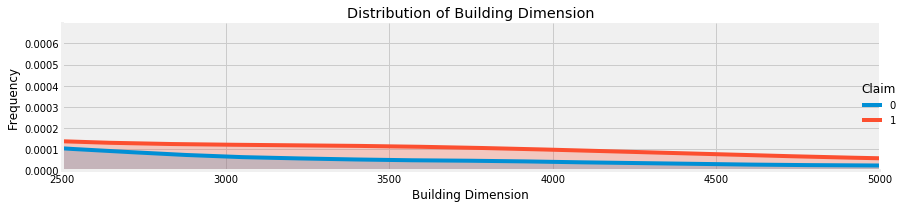

In [900]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'Building Dimension',shade= True)
facet.set(xlim=(0, train['Building Dimension'].max()))
facet.add_legend()
plt.title("Distribution of Building Dimension")
plt.xlabel("Building Dimension")
plt.ylabel("Frequency")
plt.xlim(2500,5000)
plt.tight_layout()
plt.show()

In [901]:
##train['Building Dimension'] =np.log(train['Building Dimension'])
##test['Building Dimension'] = np.log(test['Building Dimension'])

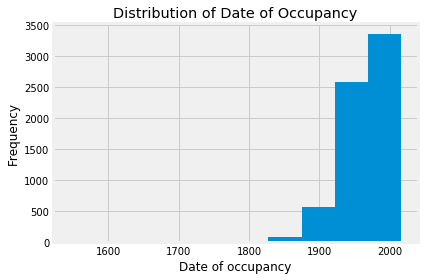

In [902]:
train['Date_of_Occupancy'].plot.hist()
plt.title("Distribution of Date of Occupancy")
plt.xlabel("Date of occupancy")
plt.ylabel("Frequency")
#plt.xticks(range(0, train['Date_of_Occupancy'].astype('int').max(),100))
plt.tight_layout()

In [903]:
train['Date_of_Occupancy'].fillna(0,inplace=True)
test['Date_of_Occupancy'].fillna(0,inplace=True)

In [904]:
def year_count(variable):
    return (2019-variable)

train['years_of_Occupancy'] = train['Date_of_Occupancy'].apply(year_count)
test['years_of_Occupancy'] =  test['Date_of_Occupancy'].apply(year_count)

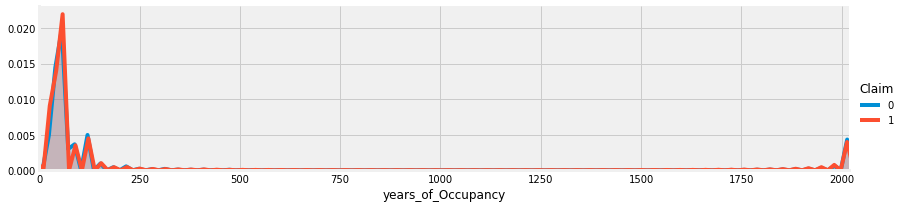

In [905]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'years_of_Occupancy',shade= True)
facet.set(xlim=(0, train['years_of_Occupancy'].max()))
facet.add_legend()
plt.xlim(0,train['years_of_Occupancy'].max())
plt.show()

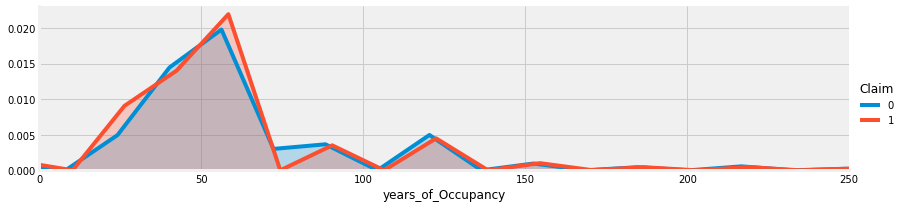

In [906]:
facet = sns.FacetGrid(train, hue="Claim",aspect=4)
facet.map(sns.kdeplot,'years_of_Occupancy',shade= True)
facet.set(xlim=(0, train['years_of_Occupancy'].max()))
facet.add_legend()
plt.xlim(0,250)
plt.show()

In [907]:
def year_count(variable):
    if variable < 1960:
        return 'Pre-Independence'
    elif variable >= 1960 and variable < 1967:
        return 'Post_Independence_pre_biafra'
    elif variable >= 1967 and variable < 1970:
        return 'Biafra_period'
    elif variable > 1970 and variable < 2001:
        return 'Post Biafra'
    else :
        return '21st Century'

train['building_occupancy_period'] = train['Date_of_Occupancy'].apply(year_count)
test['building_occupancy_period']  = test['Date_of_Occupancy'].apply(year_count)

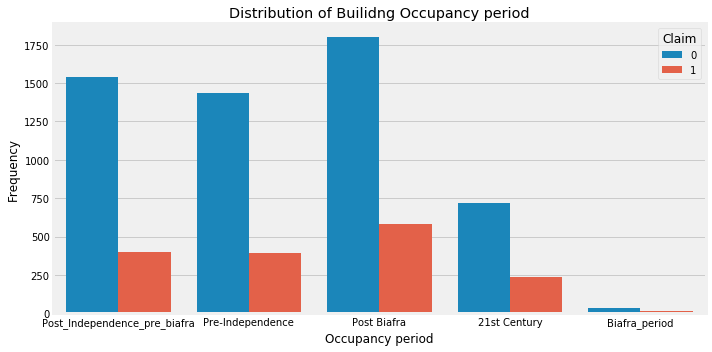

In [908]:
plt.figure(figsize=(10,5))
sns.countplot(train['building_occupancy_period'], hue='Claim', data=train)
plt.title("Distribution of Builidng Occupancy period")
plt.xlabel("Occupancy period")
plt.ylabel("Frequency")
plt.tight_layout()

In [909]:
train['building_occupancy_period'].value_counts()

Post Biafra                     2383
Post_Independence_pre_biafra    1941
Pre-Independence                1828
21st Century                     956
Biafra_period                     52
Name: building_occupancy_period, dtype: int64

In [910]:
train['Geo_Code'].value_counts()

6088     143
33063    137
6083     113
13206     98
31555     87
        ... 
54483      1
59025      1
83068      1
84031      1
90104      1
Name: Geo_Code, Length: 1307, dtype: int64

In [911]:
train['Geo_Code'].fillna(-1,inplace=True)
test['Geo_Code'].fillna(-1,inplace=True)

In [912]:
train.isnull().mean()

Customer Id                  0.0
YearOfObservation            0.0
Insured_Period               0.0
Residential                  0.0
Building_Painted             0.0
Building_Fenced              0.0
Garden                       0.0
Settlement                   0.0
Building Dimension           0.0
Building_Type                0.0
Date_of_Occupancy            0.0
NumberOfWindows              0.0
Geo_Code                     0.0
Claim                        0.0
years_of_Occupancy           0.0
building_occupancy_period    0.0
dtype: float64

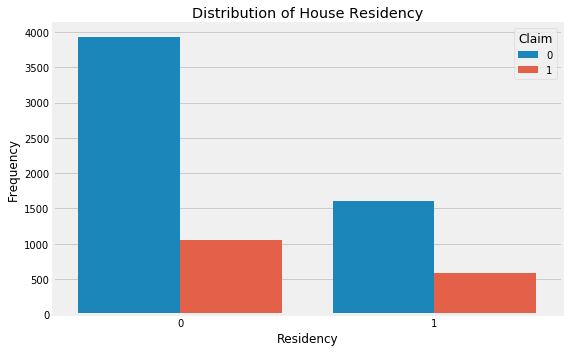

In [913]:
plt.figure(figsize= (8,5))
sns.countplot(train['Residential'] ,hue='Claim', data=train)
plt.title("Distribution of House Residency")
plt.xlabel("Residency")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

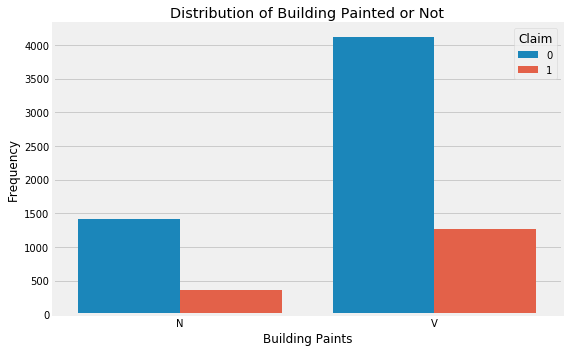

In [914]:
plt.figure(figsize= (8,5))
sns.countplot(train['Building_Painted'] ,hue='Claim', data=train)
plt.title("Distribution of Building Painted or Not")
plt.xlabel("Building Paints")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

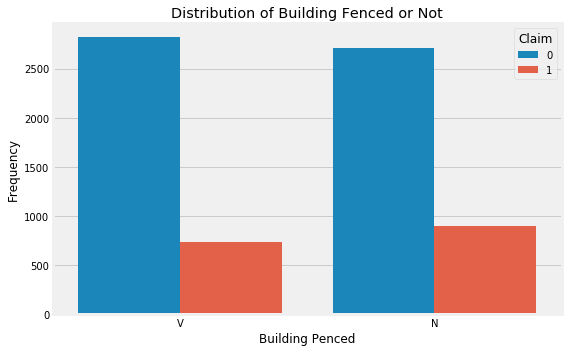

In [915]:
plt.figure(figsize= (8,5))
sns.countplot(train['Building_Fenced'] ,hue='Claim', data=train)
plt.title("Distribution of Building Fenced or Not")
plt.xlabel("Building Penced")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

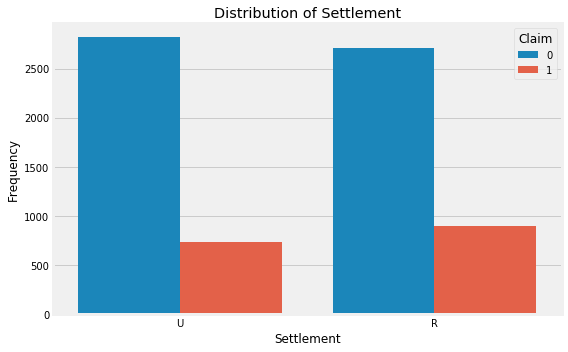

In [916]:
plt.figure(figsize= (8,5))
sns.countplot(train['Settlement'] ,hue='Claim', data=train)
plt.title("Distribution of Settlement")
plt.xlabel("Settlement")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

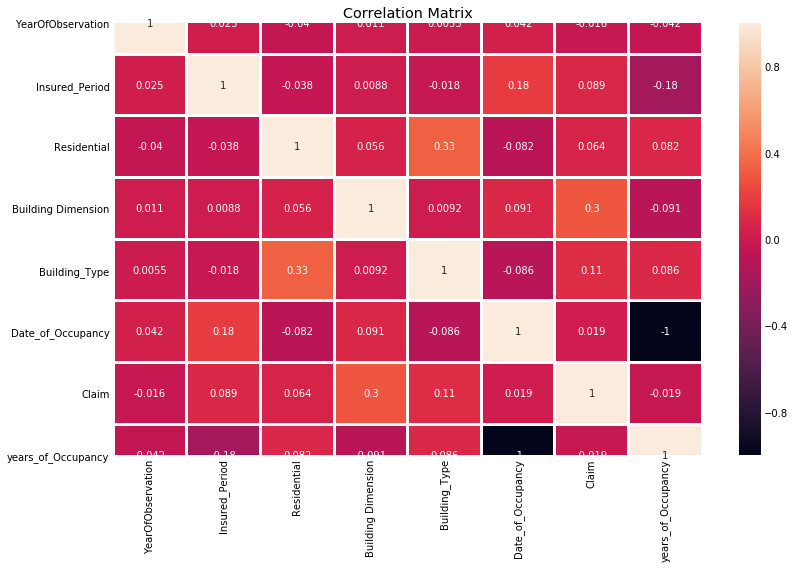

In [917]:
f,ax=plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(),linewidth=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix')
plt.tight_layout()

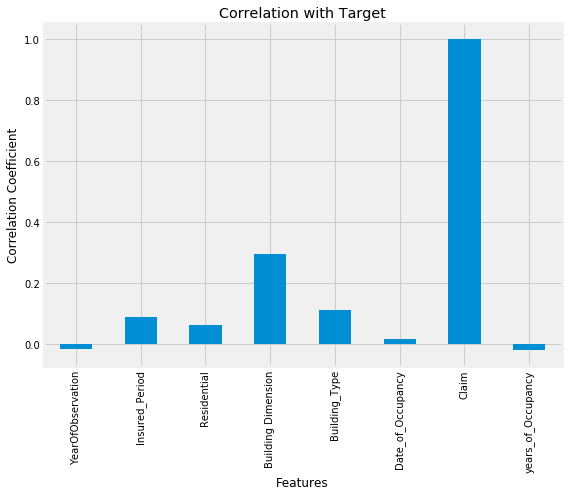

In [918]:
plt.figure(figsize=(8,7))
train.corr()['Claim'].plot.bar()
plt.title("Correlation with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

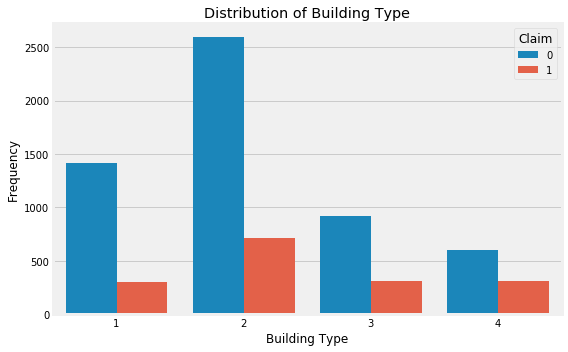

In [919]:
plt.figure(figsize= (8,5))
sns.countplot(train['Building_Type'] ,hue='Claim', data=train)
plt.title("Distribution of Building Type")
plt.xlabel("Building Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [920]:
train['Insured_Period'].value_counts()

1.000000    5325
0.997268     547
0.000000     165
0.747945      60
0.495890      49
            ... 
0.680328       1
0.819672       1
0.792350       1
0.378082       1
0.803279       1
Name: Insured_Period, Length: 401, dtype: int64

In [921]:
train['Insured_Period'] = train['Insured_Period'].round(1)
test['Insured_Period'] = test['Insured_Period'].round(1)

In [922]:
train['NumberOfWindows'].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

### Step 5 : Feature Transformation

In [923]:
def month(x):
    if x == 0.0:
        return 1
    elif x == 0.1:
        return 2
    elif x == 0.2:
        return 3
    elif x == 0.3:
        return 4
    elif x == 0.4:
        return 5
    elif x == 0.5:
        return 6
    elif x == 0.6:
        return 7
    elif x == 0.7:
        return 8
    elif x == 0.8:
        return 9
    elif x == 0.9:
        return 10
    else:
        return 12

In [924]:
train['month'] = train['Insured_Period'].apply(month)
test['month'] = test['Insured_Period'].apply(month)

In [925]:
train = train.drop('Insured_Period', axis=1)
test = test.drop('Insured_Period', axis=1)

In [926]:
train.drop('Date_of_Occupancy',axis=1,inplace=True)
test.drop('Date_of_Occupancy',axis=1,inplace=True)

In [927]:
train['Building_Fenced'] = train['Building_Fenced'].replace({'N':1, 'V':0})
train['Building_Painted'] = train['Building_Painted'].replace({'N':1, 'V':0})
train['Garden'] = train['Garden'].replace({'V':1, 'O':0})
train['Settlement'] = train['Settlement'].replace({'U':1, 'R':0})
test['Building_Fenced'] = test['Building_Fenced'].replace({'N':1, 'V':0})
test['Building_Painted'] = test['Building_Painted'].replace({'N':1, 'V':0})
test['Garden'] = test['Garden'].replace({'V':1, 'O':0})
test['Settlement'] = test['Settlement'].replace({'U':1, 'R':0})

In [928]:
train['Geo_Code'] = train['Geo_Code'].map(train['Geo_Code'].value_counts().to_dict())
test['Geo_Code'] = test['Geo_Code'].map(test['Geo_Code'].value_counts().to_dict())

In [929]:
train['NumberOfWindows'] = train['NumberOfWindows'].map(train['NumberOfWindows'].value_counts())
test['NumberOfWindows'] = test['NumberOfWindows'].map(test['NumberOfWindows'].value_counts())


In [930]:
test.head()

,Customer Id,YearOfObservation,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,years_of_Occupancy,building_occupancy_period,month
0,H11920,2013,0,0,1,0,0,300.0,1,227,3,59.0,Post_Independence_pre_biafra,12
1,H11921,2016,0,0,1,0,0,300.0,1,227,3,59.0,Post_Independence_pre_biafra,12
2,H9805,2013,0,0,0,1,1,790.0,1,2240,3,59.0,Post_Independence_pre_biafra,5
3,H7493,2014,0,0,1,0,0,1405.0,1,227,2,15.0,21st Century,12
4,H7494,2016,0,0,1,0,0,1405.0,1,227,2,15.0,21st Century,12


In [931]:
id = test['Customer Id']

In [932]:
train.drop(['Customer Id'],axis=1,inplace=True)
test.drop(['Customer Id'],axis=1,inplace=True)

In [933]:
train['Building_PFGR'] =train['Building_Painted'] + train['Building_Fenced'] + train['Garden'] + train['Residential']
test['Building_PFGR'] =test['Building_Painted'] + test['Building_Fenced'] + test['Garden'] + test['Residential']

In [934]:
test.head()

,YearOfObservation,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,years_of_Occupancy,building_occupancy_period,month,Building_PFGR
0,2013,0,0,1,0,0,300.0,1,227,3,59.0,Post_Independence_pre_biafra,12,1
1,2016,0,0,1,0,0,300.0,1,227,3,59.0,Post_Independence_pre_biafra,12,1
2,2013,0,0,0,1,1,790.0,1,2240,3,59.0,Post_Independence_pre_biafra,5,1
3,2014,0,0,1,0,0,1405.0,1,227,2,15.0,21st Century,12,1
4,2016,0,0,1,0,0,1405.0,1,227,2,15.0,21st Century,12,1


In [935]:
train=pd.get_dummies(train, columns=['building_occupancy_period'],drop_first=True)
test=pd.get_dummies(test, columns=['building_occupancy_period'], drop_first=True)

### Step 5: Modelling and Evaluation

In [936]:
X = train.drop('Claim',axis=1)
y = train['Claim']

In [937]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import Imputer, RobustScaler
from xgboost import XGBClassifier as xgbc
from xgboost import plot_importance

In [938]:
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [945]:
#Using Cross Validation to select the base model that will be used to train the model
rf_clf = RandomForestClassifier() 
pip_smote = imb_make_pipeline(RobustScaler(),
                              rf_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Random Forest model's average roc_auc: {scores.mean():.3f}")

Random Forest model's average roc_auc: 0.651


In [946]:
#Using Cross Validation to select the base model that will be used to train the model
log_clf = LogisticRegression() 
pip_smote = imb_make_pipeline(RobustScaler(),
                              log_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Logistic Regression model's average roc_auc: {scores.mean():.3f}")

Logistic Regression model's average roc_auc: 0.704


In [948]:
xg_clf = xgb.XGBClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              xg_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Xgboost model's average roc_auc: {scores.mean():.3f}")

Xgboost model's average roc_auc: 0.710


In [949]:
lg_clf = lgb.LGBMClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              lg_clf)
scores = cross_val_score(pip_smote,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)
print(f"Xgboost model's average roc_auc: {scores.mean():.3f}")

Xgboost model's average roc_auc: 0.686


In [858]:
scaler = RobustScaler()

In [859]:
scaler.fit(X_train) 

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [860]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.transform(test)

In [861]:
model = xgb.XGBClassifier()

In [862]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [863]:
predict = model.predict(X_test)

In [864]:
print(roc_auc_score(y_test,predict))

0.5850491928832333


In [865]:
prediction = model.predict(test)

['Building Dimension', 0.18585226]
['Building_Type', 0.10034151]
['Claim', 0.076089054]
['Building_Fenced', 0.07210236]
['Settlement', 0.0678262]
['Geo_Code', 0.06509901]
['Residential', 0.06503897]
['building_occupancy_period_Post_Independence_pre_biafra', 0.06363751]
['building_occupancy_period_Biafra_period', 0.06204753]
['Building_PFGR', 0.05782432]
['month', 0.047212884]
['NumberOfWindows', 0.042050328]
['YearOfObservation', 0.036675163]
['Building_Painted', 0.031069228]
['building_occupancy_period_Post Biafra', 0.02713368]
['Garden', 0.0]


<function matplotlib.pyplot.show(*args, **kw)>

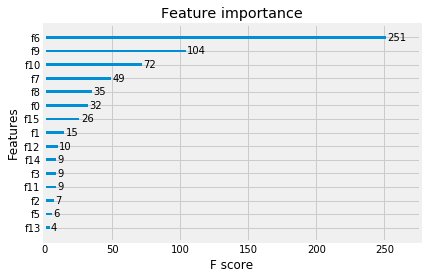

In [867]:
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([train.columns[index], model.feature_importances_[index]]) 
    
plot_importance(model, max_num_features = 15)
plt.show

In [868]:
my_submission=pd.DataFrame({'Customer Id': id,'Claim': prediction})

In [869]:
my_submission['Claim']= my_submission['Claim'].astype(int)

In [870]:
my_submission.to_csv('Submission1.csv', index=False)